In [6]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

from math import sqrt 

im_array = [cv2.imread('lines.jpg', 0), cv2.imread('spiral.jpg', 0), cv2.imread('bowser.jpg', 0)]
img = im_array[2]

# global functions
def gradient(x, y):
    out = np.zeros((x.shape[0], x.shape[1]))
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            out[i, j] = sqrt(((np.mean(x[i, j]))**2) + ((np.mean(y[i, j]))**2))
    return out

def get_gradiant_img(src = img):
    gaussian = cv2.GaussianBlur(src, (5, 5), cv2.BORDER_DEFAULT)
    s_x = np.array([ [-1 , 0 , 1] , [-2 , 0 , 2] , [-1 , 0 , 1] ])
    s_y = np.array([ [1 , 2 , 1] , [0 , 0 , 0] , [-1 , -2 , -1] ])
    img_x = cv2.filter2D(gaussian, -1, s_x)
    img_y = cv2.filter2D(gaussian, -1, s_y)
    return gradient(img_x, img_y)

def threshold_img(src, threshold):
    out = np.zeros((src.shape[0], src.shape[1]))

    for i in range(src.shape[0]):
        for j in range(src.shape[1]):
            if(src[i, j] > threshold):
                out[i, j] = 1 #white
            else: 
                out[i, j] = 0 #black
    return out 

def get_canny_img(src, lower_thresh, upper_thresh):
    return cv2.Canny(src, lower_thresh, upper_thresh)

In [7]:
# trackbar version
global canny, binary, lower_thresh, upper_thresh
canny_window = 'canny edge detector'
binary_window = 'binary edge detector'
lower_thresh = 30
upper_thresh = 70

gradiant = get_gradiant_img()
canny = img.copy()
binary = img.copy()

# Trackbar callback functions
def canny_callback_low(t): 
    global canny, lower_thresh, upper_thresh
    lower_thresh = t
    update_canny()

def canny_callback_high(t): 
    global canny, lower_thresh, upper_thresh
    upper_thresh = t
    update_canny()

def update_canny():
    global lower_thresh, upper_thresh
    cv2.imshow(canny_window, get_canny_img(img, lower_thresh, upper_thresh))

def binary_threshold_callback(t):
    global binary
    binary = threshold_img(gradiant, t)
    update_binary()

def update_binary():
    global binary
    cv2.imshow(binary_window, binary)

cv2.namedWindow(canny_window)
cv2.createTrackbar('lower threshold', canny_window, 0, 100, canny_callback_low)
cv2.setTrackbarPos('lower threshold', canny_window, lower_thresh)
cv2.createTrackbar('upper threshold', canny_window, 0, 100, canny_callback_high)
cv2.setTrackbarPos('upper threshold', canny_window, upper_thresh)

cv2.namedWindow(binary_window)
cv2.createTrackbar('threshold', binary_window, 0, 50, binary_threshold_callback)
cv2.setTrackbarPos('threshold', binary_window, 25)

while True:
    if cv2.waitKey():
        cv2.destroyAllWindows()
        break

In [8]:
#Press Any key to see next image
for src in im_array:
        gradiant = get_gradiant_img(src)
        thresh_img = threshold_img(gradiant, 50)
        name = 'Thresholded Image, thresh = 50'
        cv2.imshow(name, thresh_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

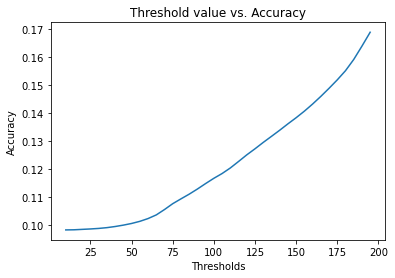

In [10]:
# Print comparison results
def get_match_ratio(img1, img2):
    edges1 = 0
    edges2 = 0

    # Loop through images
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            if(img1[i, j] > 0):
                edges1 += 1
            if(img2[i, j] > 0):
                edges2 += 1

    return (edges2 / edges1 if edges1 > edges2 else edges1/edges2)

canny = get_canny_img(img, 20, 80)
thresholds = [i for i in range(10, 200, 5)]
comparison_results = []

for thresh in thresholds:
    binary = threshold_img(img, thresh)
    comparison_results.append(get_match_ratio(canny, binary))

plt.plot(thresholds, comparison_results)
plt.xlabel('Thresholds')
plt.ylabel('Accuracy')
plt.title("Threshold value vs. Accuracy")
plt.show()